# Music Recommendation

## Author Name - Vaibhav Rokde
## Data Science Intern @LGM
## Task - 03
### Music recommendation systems can suggest songs to user based on thair listening pattern

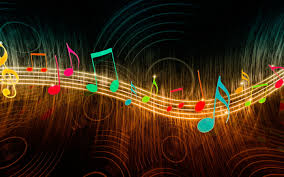

## Important Modules

In [1]:
import pandas as pd
import numpy as np
import Recommenders as Recommenders

## Load Dataset

In [2]:
df1=pd.read_csv('triplets_file.csv')

In [3]:
df2=pd.read_csv('song_data.csv')

In [4]:
df1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [5]:
df2.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [8]:
df=pd.merge(df1, df2.drop_duplicates(['song_id']), on='song_id', how='left')

In [9]:
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [10]:
len(df)

2000000

In [11]:
len(df1)

2000000

In [12]:
len(df2)

1000000

## Preprocessing

In [15]:
df['song'] = (df['title']) + " - " +df['artist_name']

In [16]:
df.head()

,user_id,song_id,listen_count,title,release,artist_name,year,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999,Learn To Fly - Foo Fighters


In [21]:
df_grouped = df.groupby(['song']).agg({'listen_count':'count'}).reset_index()

In [23]:
df_grouped.head()

,song,listen_count
0,#!*@ You Tonight [Featuring R. Kelly] (Explici...,78
1,#40 - DAVE MATTHEWS BAND,338
2,& Down - Boys Noize,373
3,' Cello Song - Nick Drake,103
4,'97 Bonnie & Clyde - Eminem,93


In [24]:
song_grouped_sum = df_grouped['listen_count'].sum()

In [26]:
df_grouped['percentage']=(df_grouped['listen_count']/song_grouped_sum)*100
df_grouped.sort_values(['listen_count', 'song'], ascending=[0,1])

,song,listen_count,percentage
7127,Sehr kosmisch - Harmonia,8277,0.41385
9084,Undo - Björk,7032,0.35160
2068,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,0.34745
9880,You're The One - Dwight Yoakam,6412,0.32060
6774,Revelry - Kings Of Leon,6145,0.30725
...,...,...,...
3526,Historia Del Portero - Ricardo Arjona,51,0.00255
7071,Scared - Three Days Grace,51,0.00255
2147,Don´t Leave Me Now - Amparanoia,50,0.00250
2991,Ghosts (Toxic Avenger Mix) - Ladytron,48,0.00240


## Popularity Recommender

In [28]:
pr = Recommenders.popularity_recommender_py()

In [30]:
pr.create(df, 'user_id', 'song')

In [32]:
pr.recommend(df['user_id'][4])

,user_id,song,score,Rank
7127,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,8277,1.0
9084,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,7032,2.0
2068,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,6412,4.0
6774,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,6145,5.0
7115,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,5841,6.0
3613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,4795,8.0
3485,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,4758,9.0
8847,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,4548,10.0


In [33]:
pr.recommend(df['user_id'][32])

,user_id,song,score,Rank
7127,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,8277,1.0
9084,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,7032,2.0
2068,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,6949,3.0
9880,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You're The One - Dwight Yoakam,6412,4.0
6774,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,6145,5.0
7115,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,5841,6.0
3613,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,5385,7.0
2717,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,4795,8.0
3485,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,4758,9.0
8847,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,4548,10.0


## Item Semilarity Recommendation

In [34]:
ir = Recommenders.item_similarity_recommender_py()

In [42]:
df=df.head(10000)

In [43]:
ir.create(df, 'user_id', 'song')

In [44]:
user_items=ir.get_user_items(df['user_id'][131])


In [45]:
for user_item in user_items:
    print(user_item)

Harder Better Faster Stronger - Daft Punk
Jumping Jack Flash - The Rolling Stones
Aerodynamic - Daft Punk
You Know What You Are? - Nine Inch Nails
Indo Silver Club - Daft Punk
Steam Machine - Daft Punk
High Life - Daft Punk
D.A.N.C.E. [Radio Edit] - Justice
Emotion - Daft Punk
Meanwhile_ Rick James... - Cake
Face To Face - Daft Punk
Digital Love - Daft Punk
Fresh - Daft Punk
Sad Songs And Waltzes - Cake
Especially In Michigan (Album Version) - Red Hot Chili Peppers
Rock'n Roll - Daft Punk
Nightvision - Daft Punk
The Brainwasher - Daft Punk
C'mon Girl (Album Version) - Red Hot Chili Peppers
It's Tricky - RUN-DMC
Around The World (Radio Edit) - Daft Punk
Strip My Mind (Album Version) - Red Hot Chili Peppers
Top Down - Swizz Beatz
The Real Slim Shady - Eminem
I Could Have Lied (Album Version) - Red Hot Chili Peppers
Opera Singer - Cake
The Prime Time Of Your Life - Daft Punk
I'm Back - Eminem
Sinisten tähtien alla - J. Karjalainen & Mustat Lasit
One More Time (Short Radio Edit) - Daft Pun

In [46]:
ir.recommend(df['user_id'][131])

No. of unique songs for the user: 65
no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :17479


,user_id,song,score,rank
0,b64cdd1a0bd907e5e00b39e345194768e330d652,Testament (feat. Gonja Sufi) - Flying Lotus,0.119583,1
1,b64cdd1a0bd907e5e00b39e345194768e330d652,I GOT THIS DOWN - Simian Mobile Disco,0.119583,2
2,b64cdd1a0bd907e5e00b39e345194768e330d652,Tone Bank Jungle - Holy Fuck,0.119583,3
3,b64cdd1a0bd907e5e00b39e345194768e330d652,Jupiter Approach - Digitalism,0.119583,4
4,b64cdd1a0bd907e5e00b39e345194768e330d652,Golden Diva - Flying Lotus,0.119583,5
5,b64cdd1a0bd907e5e00b39e345194768e330d652,Breathe . Something/Stellar STar - Flying Lotus,0.119583,6
6,b64cdd1a0bd907e5e00b39e345194768e330d652,and then patterns - Four Tet,0.119583,7
7,b64cdd1a0bd907e5e00b39e345194768e330d652,Milkshake - Holy Fuck,0.119583,8
8,b64cdd1a0bd907e5e00b39e345194768e330d652,1983 - Flying Lotus,0.119583,9
9,b64cdd1a0bd907e5e00b39e345194768e330d652,Hotdog - Simian Mobile Disco,0.119583,10


In [50]:
ir.get_similar_items('Golden Diva - Flying Lotus')

no. of unique songs in the training set: 5151
Non zero values in cooccurence_matrix :0


,user_id,song,score,rank
0,,Nice Weather For Ducks - Lemon Jelly,0.0,1
1,,The Irony Of It All (Album Version) - The Streets,0.0,2
2,,Officially Missing You (Radio Version) - Tamia,0.0,3
3,,On The Road Again (Pigna People Remix) - Telex,0.0,4
4,,What Can Be Safely Written - Nile,0.0,5
5,,Lord I Guess I'll Never Know - The Verve,0.0,6
6,,Take Em To Church - Cam'Ron / Juelz Santana / ...,0.0,7
7,,This Ain't A Scene_ It's An Arms Race - Fall O...,0.0,8
8,,Praise You - Fatboy Slim,0.0,9
9,,Yeah Yeah - Bodyrox,0.0,10


Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Shree\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Shree\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Shree\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Shree\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Shree\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\Shree\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\Shree\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed b